In [1]:
# Integration of biopsies and organ donors from 2 studies
import anndata, numpy as np, pandas as pd, scanpy as sc, imp, re, rpy2
%load_ext rpy2.ipython
sc.logging.print_versions()
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows', 1000)
import lpy # local lpy.py file

In [2]:
# Set some constants
adata = anndata.read_h5ad("int4.h5ad")
adata.obs[ "sample_names" ].value_counts()

T3_C-0           19557
I-O-7-N_C-0      19043
I-O-5_8_C-0      16419
I-O-5_8-N_C-0    15453
I-O-6_9-N_C-0    15293
I-O-7_C-0        12892
I-O-6_9_C-0      12682
T2_C-0           12342
MH8919333        11970
S-HC015          10771
T1_C-0           10685
S-HC013          10477
S-HC017          10065
S-M067            9952
S-HC014           8393
S-S065            8129
MH8919332         7850
MH8919178         6948
newcastle74       6850
BGCV01_CV0904     6847
MH8919282         6802
MH8919283         6642
S-S054            5763
S-M044-1          5700
S-M044-2          5684
newcastle65       5604
S-S067            5592
S-S068            5298
S-HC010           5138
S-S055            5103
S-M051            5096
S-M052            4987
S-S057            4544
S-M046            4235
MH8919179         4214
S-M047            4172
S-M055            4117
S-M050            3821
S-S059            3772
S-HC008           3673
BGCV13_CV0934     3408
MH8919176         3085
BGCV14_CV0940     2957
BGCV09_CV09

In [3]:
clusters = np.array([x for x in adata.obs["leiden_every_bcell20unpool"] ], dtype="object")
clusters[(adata.obs["leidenres2_every_bcell20unpool"] == "25")] = "127"

target = "bcell20unpool"
renamedico ={
 tuple(['5', '0', '1', '9', '4', '8']): 'Bcell naive',
 tuple(['3', '10']):  'Bcell US-mem',
 '6': 'Bcell CD21 Low',
 '2': 'Bcell S-mem',
 '7': 'Plasma Bcells',
 '127': 'doublets',  # missed small (160 cells) B:T doublet cluster among bcells
 'filtered': 'filtered'}
adata.obs[target] = lpy.applyFactorRename(clusters,renamedico)

tmp = lpy.mydoublerainbow([4,1])
tmp.append("#888888")
tmp.append("#FFFFFF")
adata.uns[target + "_colors"] = np.array(tmp, dtype = "object")
print(len(adata.obs[target].cat.categories))
adata.uns[target + "_colors"].shape
adata.obs[target].value_counts()

7


filtered          350254
Bcell naive        12980
Bcell S-mem         3532
Bcell US-mem        3444
Bcell CD21 Low      1366
Plasma Bcells        984
doublets             160
Name: bcell20unpool, dtype: int64

In [4]:

clusters = np.array([x for x in adata.obs["leidenres2_every_tcell20unpool"] ], dtype="object")

clusters[(adata.obsm["X_umap_every_tcell20unpool"][:,0] >3)&(adata.obs["leidenres2_every_tcell20unpool"] == "27")] = "127"


target = "tcell20unpool"
renamedico ={
 tuple(['1', '5']): 'T Naive CD4',
 tuple(['6','13','23','22']): 'TCM CD4',
 '3': 'TEM CD4',
 '8': 'T Effector CD4',
 '7': 'T Naive CD8',
 tuple(['4', '25', '127']) : 'TEM CD8',
 tuple(['10', '2']) : 'TE CD8',
 tuple(['20', '19', '24', '9']): 'NKT-like',
 tuple(['0', '15', '14']): 'NK CD16',
 '17': 'NK CD56',
 '16': 'Tcell Cycling',
 '11': 'Cytotoxic T cell',
 '21': 'Treg',
 '12': 'gdT',
 '27' : 'dnT',
 '18': 'MAIT',
 '26': 'High mito', 
 'filtered': 'filtered'}
adata.obs[target] = lpy.applyFactorRename(clusters,renamedico)

#adata.uns["leiden_sampl_China_colors"] = { x: y for x,y in zip(adata.obs["leiden_sampl_China"].cat.categories, lpy.mydoublerainbow([4,5,5,4,2,2,2]))}
tmp = lpy.mydoublerainbow([4,3,3,2,3,1,1])
tmp.append("#FFFFFF")
adata.uns[target + "_colors"] = np.array(tmp, dtype = "object")
print(len(adata.obs[target].cat.categories))
adata.uns[target + "_colors"].shape

18


(18,)

In [5]:
clusters = np.array([x for x in adata.obs["leiden_every_mono20unpool"] ], dtype="object")

clusters[(adata.obsm["X_umap_every_mono20unpool"][:,0] - adata.obsm["X_umap_every_mono20unpool"][:,1] >12.4)&(adata.obs["leiden_every_mono20unpool"] == "8")] = "127"
clusters[(adata.obsm["X_umap_every_mono20unpool"][:,0] + adata.obsm["X_umap_every_mono20unpool"][:,1] >11)&(adata.obs["leiden_every_mono20unpool"] == "8")] = "128"
clusters[(adata.obsm["X_umap_every_mono20unpool"][:,0]  >3.15)&(adata.obs["leiden_every_mono20unpool"] == "1")] = "129"

target = "mono20unpool"
renamedico ={
 tuple(['0', '4', '7', '9', '10', '14']): 'Classical monocytes',
 tuple(['3' , '13']): 'Cl. mono S100A8',
 '6': 'Cl. mono IFN',
 '5': 'Cl. mono inflammasome',
 '2': 'Intermediate monocytes',
 '1': 'Non-classical monocytes',
 tuple(['17','8']): 'cDCs',
 '127' : "ASDC", # missed ASDC cluster, found using azimuth prediction
 '12': 'pDC',
 '16': 'hSC',
 '11': 'Platelets',
 '18': 'Erythrocytes',
 tuple(['15',"128","129"]): 'Mono:T doublet', # missed doublet cluster
 'filtered': 'filtered'}
adata.obs[target] = lpy.applyFactorRename(clusters,renamedico)

tmp = lpy.mydoublerainbow([4,2,4,2,1])
tmp.append("#FFFFFF")
adata.uns[target + "_colors"] = np.array(tmp, dtype = "object")
print(len(adata.obs[target].cat.categories))
adata.uns[target + "_colors"].shape

14


(14,)

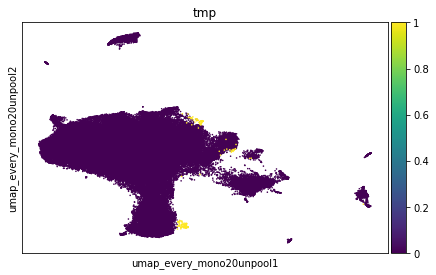

In [6]:
adata.obs["tmp"] = (adata.obsm["X_umap_every_mono20unpool"][:,0]  >3.15)&(adata.obs["leiden_every_mono20unpool"] == "1")
sc.pl.scatter(adata, color = "tmp", basis = "umap_every_mono20unpool",size= 10)

In [7]:
mergeannot = [x for x in adata.obs["mono20unpool"]]
mergeannot = [x if x != "filtered" else y for x,y in zip(adata.obs["tcell20unpool"],mergeannot)]
mergeannot = [x if x != "filtered" else y for x,y in zip(adata.obs["bcell20unpool"],mergeannot)]

target = "general_integrated2"
renamedico ={
 'T Naive CD4': 'T Naive CD4',
 'TCM CD4': 'TCM CD4',
 'TEM CD4': 'TEM CD4',
 'T Effector CD4': 'T Effector CD4',
 'T Naive CD8': 'T Naive CD8',
 'TEM CD8' : 'TEM CD8',
 'TE CD8' : 'TE CD8',
 'NKT-like': 'NKT-like',
 'NK CD16': 'NK CD16',
 'NK CD56': 'NK CD56',
 'Tcell Cycling': 'Tcell Cycling',
 'Cytotoxic T cell': 'Cytotoxic T cell',
 'Treg': 'Treg',
 'gdT': 'gdT',
 'dnT': 'dnT',
 'MAIT': 'MAIT',
  
 'Bcell naive' : 'Bcell naive',
 'Bcell CD21 Low': 'Bcell CD21 Low', 
 'Bcell US-mem':  'Bcell US-mem',
 'Bcell S-mem': 'Bcell S-mem',
 'Plasma Bcells': 'Plasma Bcells',

    
 'Classical monocytes': 'Classical monocytes',
 'Cl. mono S100A8': 'Cl. mono S100A8',
 'Cl. mono IFN': 'Cl. mono IFN',
 'Cl. mono inflammasome': 'Cl. mono inflammasome',
 'Intermediate monocytes': 'Intermediate monocytes',
 'Non-classical monocytes': 'Non-classical monocytes',
 tuple(['17','8']): 'cDCs',
 "ASDC" : "ASDC",
 'pDC': 'pDC',
 'hSC': 'hSC',
 'Platelets': 'Platelets',
 'Erythrocytes': 'Erythrocytes',
 tuple(['Mono:T doublet','High mito','doublets', 'filtered']): 'filtered',
 }
adata.obs[target] = lpy.applyFactorRename(mergeannot,renamedico)

tmp.append("#FFFFFF")
adata.uns[target + "_colors"] = np.array(tmp, dtype = "object")
print(len(adata.obs[target].cat.categories))
adata.uns[target + "_colors"].shape
adata.obs[target].value_counts()

34


filtered                   82186
Classical monocytes        31313
NK CD16                    31134
T Naive CD4                26805
TE CD8                     22474
TCM CD4                    19856
NKT-like                   16699
TEM CD8                    13585
Bcell naive                12980
TEM CD4                    12335
Non-classical monocytes     9209
Cl. mono S100A8             9023
T Naive CD8                 8699
T Effector CD4              8387
Intermediate monocytes      8190
Cytotoxic T cell            7697
gdT                         6694
Cl. mono inflammasome       6519
Cl. mono IFN                6322
Tcell Cycling               4714
NK CD56                     4586
cDCs                        4175
MAIT                        3729
Bcell S-mem                 3532
Bcell US-mem                3444
Treg                        2732
Platelets                   1414
Bcell CD21 Low              1366
pDC                         1276
Plasma Bcells                984
dnT       

In [8]:
# Introducing TRC/BRC info

TCRdata = []
BCRdata = []

samples = { "T1_C-0" : ["javi/AU_T1_BCR_C-VDJ/outs", "javi/AU_T1_TCR_C-VDJ/outs"],"T2_C-0" : ["javi/AU_T2_BCR_C-VDJ/outs", "javi/AU_T2_TCR_C-VDJ/outs"],"T3_C-0" : ["javi/AU_T3_BCR_C-VDJ/outs", "javi/AU_T3_TCR_C-VDJ/outs"],
            "I-O-7_C-0" : ["", "I-O-7_C-0/outs"],
            "I-O-7-N_C-0" : ["I-O-7-N_C-0/outs",""],
            "I-O-5_8_C-0" : ["", "I-O-5_8_C-0/outs"],
            "I-O-5_8-N_C-0" : ["I-O-5_8-N_C-1/outs",""],
            "I-O-6_9_C-0" : ["", "I-O-6_9_C-0/outs"],
            "I-O-6_9-N_C-0" : ["I-O-6_9-N_C-1/outs",""]
          }
#sample = [ "/lustre/scratch117/cellgen/team292/lh20/"+ x +"all_contig_annotations.csv" for x in ["javi/AU_T1_BCR_C-VDJ/outs/","javi/AU_T2_BCR_C-VDJ/outs/","javi/AU_T3_BCR_C-VDJ/outs/","javi/AU_T1_TCR_C-VDJ/outs/","javi/AU_T2_TCR_C-VDJ/outs/","javi/AU_T3_TCR_C-VDJ/outs/"] ]
csvlist = [  x +"all_contig_annotations.csv" for x in ["javi/AU_T1_BCR_C-VDJ/outs/","javi/AU_T2_BCR_C-VDJ/outs/","javi/AU_T3_BCR_C-VDJ/outs/","javi/AU_T1_TCR_C-VDJ/outs/","javi/AU_T2_TCR_C-VDJ/outs/","javi/AU_T3_TCR_C-VDJ/outs/"] ]
base = 0
for sample,path in samples.items():
    if (len(path[0]) >0):
        adata_tcr = pd.read_csv("/lustre/scratch117/cellgen/team292/lh20/"+ path[0] + "/all_contig_annotations.csv" );
        adata_tcr["barcode"] = [ sample + "_" + re.sub("-1", "",s)  for s in adata_tcr["barcode"]]
        adata_tcr["sample"] = [ sample for s in adata_tcr["barcode"]]
        adata_tcr["raw_clonotype_id"] = [ sample + "_BCR_" + s if isinstance(s, str)&(s != "None") else "NONE"  for s in adata_tcr["raw_clonotype_id"]]
        adata_tcr["raw_consensus_id"] = [ sample + "_BCR_" + s if isinstance(s, str)&(s != "None") else "NONE"  for s in adata_tcr["raw_consensus_id"]]
        BCRdata.append(adata_tcr)
    if (len(path[1]) >0):
        adata_tcr = pd.read_csv("/lustre/scratch117/cellgen/team292/lh20/"+ path[1] + "/all_contig_annotations.csv" );
        adata_tcr["barcode"] = [ sample + "_" + re.sub("-1", "",s)  for s in adata_tcr["barcode"]]
        adata_tcr["sample"] = [ sample for s in adata_tcr["barcode"]]
        adata_tcr["raw_clonotype_id"] = [ sample + "_TCR_" + s if isinstance(s, str)&(s != "None") else "NONE"  for s in adata_tcr["raw_clonotype_id"]]
        adata_tcr["raw_consensus_id"] = [ sample + "_TCR_" + s if isinstance(s, str)&(s != "None") else "NONE"  for s in adata_tcr["raw_consensus_id"]]
        TCRdata.append(adata_tcr)
BCRdata = pd.concat(BCRdata,ignore_index=True)
TCRdata = pd.concat(TCRdata,ignore_index=True)


In [9]:
TCRdata = pd.read_csv("/lustre/scratch117/cellgen/team292/lh20/tconcat/outs/vdj_t/filtered_contig_annotations.csv")
BCRdata = pd.read_csv("/lustre/scratch117/cellgen/team292/lh20/bconcat/outs/vdj_b/filtered_contig_annotations.csv")

In [10]:
import re
tmp = {re.sub("..$", "",x):y for x,y in zip (BCRdata["barcode"], range(BCRdata.shape[0]))}
damap = np.array([tmp[re.sub("-*..$", "",x)] if re.sub("-*..$", "",x) in tmp else -1 for x in adata.obs_names])
adata.obs["demultiplexed"][damap != -1].value_counts()
tmp = {re.sub("..$", "",x):y for x,y in zip (TCRdata["barcode"], range(TCRdata.shape[0]))}
damap2 = np.array([tmp[re.sub("-*..$", "",x)] if re.sub("-*..$", "",x) in tmp else -1 for x in adata.obs_names])
adata.obs["demultiplexed"][damap2 != -1].value_counts()
dual = ((damap != -1)&(damap2 != -1))
adata.obs["VDJ_type"] = "NONE"
damap2[(damap != -1)&(adata.obs["leiden_sampl_Hani"] == "B_cell")] =0
adata.obs["VDJ_type"][damap != -1] = "BCR"
adata.obs["VDJ_type"][damap2 != -1] = "TCR"

In [11]:
adata.obs["clonotype"] = "None"
flt = np.array(damap != -1)
adata.obs["clonotype"][flt] = [BCRdata["raw_clonotype_id"][x] for x in damap[flt]]
flt = np.array(damap2 != -1)
adata.obs["clonotype"][flt] = [TCRdata["raw_clonotype_id"][x] for x in damap2[flt]]
adata.obs["clonotype"] = ["None" if y == "NONE" else ("T_" + str(x) if y == "TCR" else "B_"+ str(x))  for x,y in zip(adata.obs["clonotype"], adata.obs["VDJ_type"])]

In [12]:
imp.reload(lpy)
res = lpy.RTable(adata.obs[adata.obs["StudyName"] == "Javi"], "clonotype" , "Stage")

res["class"] = pd.Categorical(["Unique" if x+y+z < 2 else "Post" if (x + y) * 5 < z else "During" if x * 10 < x+y+z else "Prior" for x,y,z in zip(res["baseline"],res["progression"],res["convalescence"]) ])
res["sum"] = pd.Categorical([x+y+z for x,y,z in zip(res["baseline"],res["progression"],res["convalescence"]) ])
res["class"].head(n=13)

None              Prior
T_clonotype1     During
T_clonotype3      Prior
T_clonotype5     During
T_clonotype4       Post
T_clonotype7      Prior
T_clonotype6      Prior
T_clonotype9     During
T_clonotype2      Prior
T_clonotype8      Prior
T_clonotype11     Prior
T_clonotype13     Prior
T_clonotype12      Post
Name: class, dtype: category
Categories (4, object): ['During', 'Post', 'Prior', 'Unique']

In [13]:
map = {res.index[x] : x for x in range(res.shape[0])} # 
adata.obs["clonotype_class"] = ["None" if x == 0 else 
                     "Unique" if res["class"][x] == "Unique" else 
                     "Prior_in_baseline" if y == "baseline" else 
                     "Post_progression" if res["class"][x] == "Post" else
                     ("Prior_in_progression" if  y == "progression" else "Prior_in_convalescense") if  res["class"][x] == "Prior" else
                     ("During_in_progression" if  y == "progression" else "During_in_convalescense") for x,y in zip([map[x] for x in adata.obs["clonotype"]], adata.obs["Stage"]) ]
adata.obs["clonotype_class"].value_counts()

None                       331944
Unique                      17053
Prior_in_baseline            5034
Prior_in_progression         5027
During_in_progression        4331
Post_progression             4243
Prior_in_convalescense       3995
During_in_convalescense      1093
Name: clonotype_class, dtype: int64

In [14]:
imp.reload(lpy)
adatasub = adata[adata.obs["StudyName"] == "Javi"]
#res2 = lpy.RTable(adatasub.obs , "demultiplexed", "clonotype", make_max_dico=True)
#res2 = {x : res2[x] + "_" if res2[x]  != "doublet" and res2[x]  != "unassigned" else "" for x in res2 }
#del res2['None']
res = adata.obs["clonotype"].value_counts()
filterlist = res.index[res < [ 8 if x[0] == "T" else 4 for x in res.index ]]
adata.obs["clonotype"] = [(res2[x] + x if x not in filterlist else  (res2[x] + "T_rare_clonotype" if y == "TCR" else res2[x] + "B_rare_clonotype")) if x in res2 else "None" for x,y in zip(adata.obs["clonotype"], adata.obs["VDJ_type"], )]
adata.obs["clonotype"].value_counts()

None                      331944
CVID1_T_rare_clonotype      5166
CVID3_T_rare_clonotype      3997
CVID2_T_rare_clonotype      2846
CVID4_T_rare_clonotype      1988
T_rare_clonotype            1787
CVID2_B_rare_clonotype      1184
CVID1_B_rare_clonotype      1143
CVID5_T_rare_clonotype      1141
CVID1_T_clonotype1           737
CVID4_T_clonotype3           687
CVID1_T_clonotype5           671
CVID1_T_clonotype4           640
CVID2_T_clonotype7           577
CVID2_T_clonotype6           571
CVID1_T_clonotype9           557
CVID2_T_clonotype8           547
CVID1_T_clonotype2           547
CVID4_B_rare_clonotype       539
B_rare_clonotype             529
CVID3_T_clonotype11          518
CVID4_T_clonotype13          482
CVID1_T_clonotype12          478
CVID1_T_clonotype10          424
CVID3_T_clonotype16          337
CVID1_T_clonotype14          330
CVID1_T_clonotype15          307
CVID4_T_clonotype18          287
CVID4_T_clonotype22          253
CVID1_T_clonotype20          252
CVID1_T_cl

In [15]:
adata.obs["clonotype"].value_counts()

None                331944
T_rare_clonotype     16925
B_rare_clonotype      3440
T_clonotype1           737
T_clonotype3           687
                     ...  
B_clonotype51            4
B_clonotype50            4
B_clonotype41            4
B_clonotype49            4
B_clonotype37            4
Name: clonotype, Length: 314, dtype: int64

In [16]:
tmp = TCRdata[TCRdata["chain"] == "TRA"]
vA = {tmp["raw_clonotype_id"][x] : tmp["v_gene"][x]  for x in tmp.index}
jA = {tmp["raw_clonotype_id"][x] : tmp["j_gene"][x]  for x in tmp.index}
cA = {tmp["raw_clonotype_id"][x] : tmp["c_gene"][x]  for x in tmp.index}
dA = {tmp["raw_clonotype_id"][x] : tmp["d_gene"][x]  for x in tmp.index}
tmp = TCRdata[TCRdata["chain"] == "TRB"]
vB = {tmp["raw_clonotype_id"][x] : tmp["v_gene"][x]  for x in tmp.index}
jB = {tmp["raw_clonotype_id"][x] : tmp["j_gene"][x]  for x in tmp.index}
cB = {tmp["raw_clonotype_id"][x] : tmp["c_gene"][x]  for x in tmp.index}
dB = {tmp["raw_clonotype_id"][x] : tmp["d_gene"][x]  for x in tmp.index}
tmp = BCRdata[BCRdata["chain"] == "IGH"]
vA_ = {tmp["raw_clonotype_id"][x] : tmp["v_gene"][x]  for x in tmp.index}
jA_ = {tmp["raw_clonotype_id"][x] : tmp["j_gene"][x]  for x in tmp.index}
cA_ = {tmp["raw_clonotype_id"][x] : tmp["c_gene"][x]  for x in tmp.index}
dA_ = {tmp["raw_clonotype_id"][x] : tmp["d_gene"][x]  for x in tmp.index}
tmp = BCRdata[BCRdata["chain"] != "IGH"]
vB_ = {tmp["raw_clonotype_id"][x] : tmp["v_gene"][x]  for x in tmp.index}
jB_ = {tmp["raw_clonotype_id"][x] : tmp["j_gene"][x]  for x in tmp.index}
cB_ = {tmp["raw_clonotype_id"][x] : tmp["c_gene"][x]  for x in tmp.index}
dB_ = {tmp["raw_clonotype_id"][x] : tmp["d_gene"][x]  for x in tmp.index}

adata.obs["TRA_V_Gene"] = [ (vA[x] if x in vA  else "nan") if t == "TCR" else ((vA_[x] if x in vA_  else "nan") if t == "BCR" else "None") for t,x in zip(adata.obs["VDJ_type"],adata.obs["clonotype"]) ]
adata.obs["TRA_J_Gene"] = [ (jA[x] if x in jA  else "nan") if t == "TCR" else ((jA_[x] if x in jA_  else "nan") if t == "BCR" else "None") for t,x in zip(adata.obs["VDJ_type"],adata.obs["clonotype"]) ]
adata.obs["TRB_V_Gene"] = [(vB[x] if x in vB  else "nan") if t == "TCR" else ((vB_[x] if x in vB_  else "nan") if t == "BCR" else "None") for t,x in zip(adata.obs["VDJ_type"],adata.obs["clonotype"]) ]
adata.obs["TRB_J_Gene"] = [(jB[x] if x in jB  else "nan") if t == "TCR" else ((jB_[x] if x in jB_  else "nan") if t == "BCR" else "None") for t,x in zip(adata.obs["VDJ_type"],adata.obs["clonotype"]) ]
adata.obs["TR_D_Genes"] = [str(dA[x] if x in dA  else "nan") + "_" +  str(dB[x] if x in dB  else "nan") if t == "TCR" else  (str(dA_[x] if x in dA_  else "nan") + "_" +  str(dB_[x] if x in dB_  else "nan") if t == "BCR" else "None")  for t,x in zip(adata.obs["VDJ_type"],adata.obs["clonotype"]) ]
adata.obs["TR_C_Genes"] = [str(cA[x] if x in cA  else "nan") + "_" + str(cB[x] if x in cB  else "nan") if t == "TCR" else  (str(cA_[x] if x in cA_  else "nan") + "_" + str(cB_[x] if x in cB_  else "nan") if t == "BCR" else "None")  for t,x in zip(adata.obs["VDJ_type"],adata.obs["clonotype"]) ]



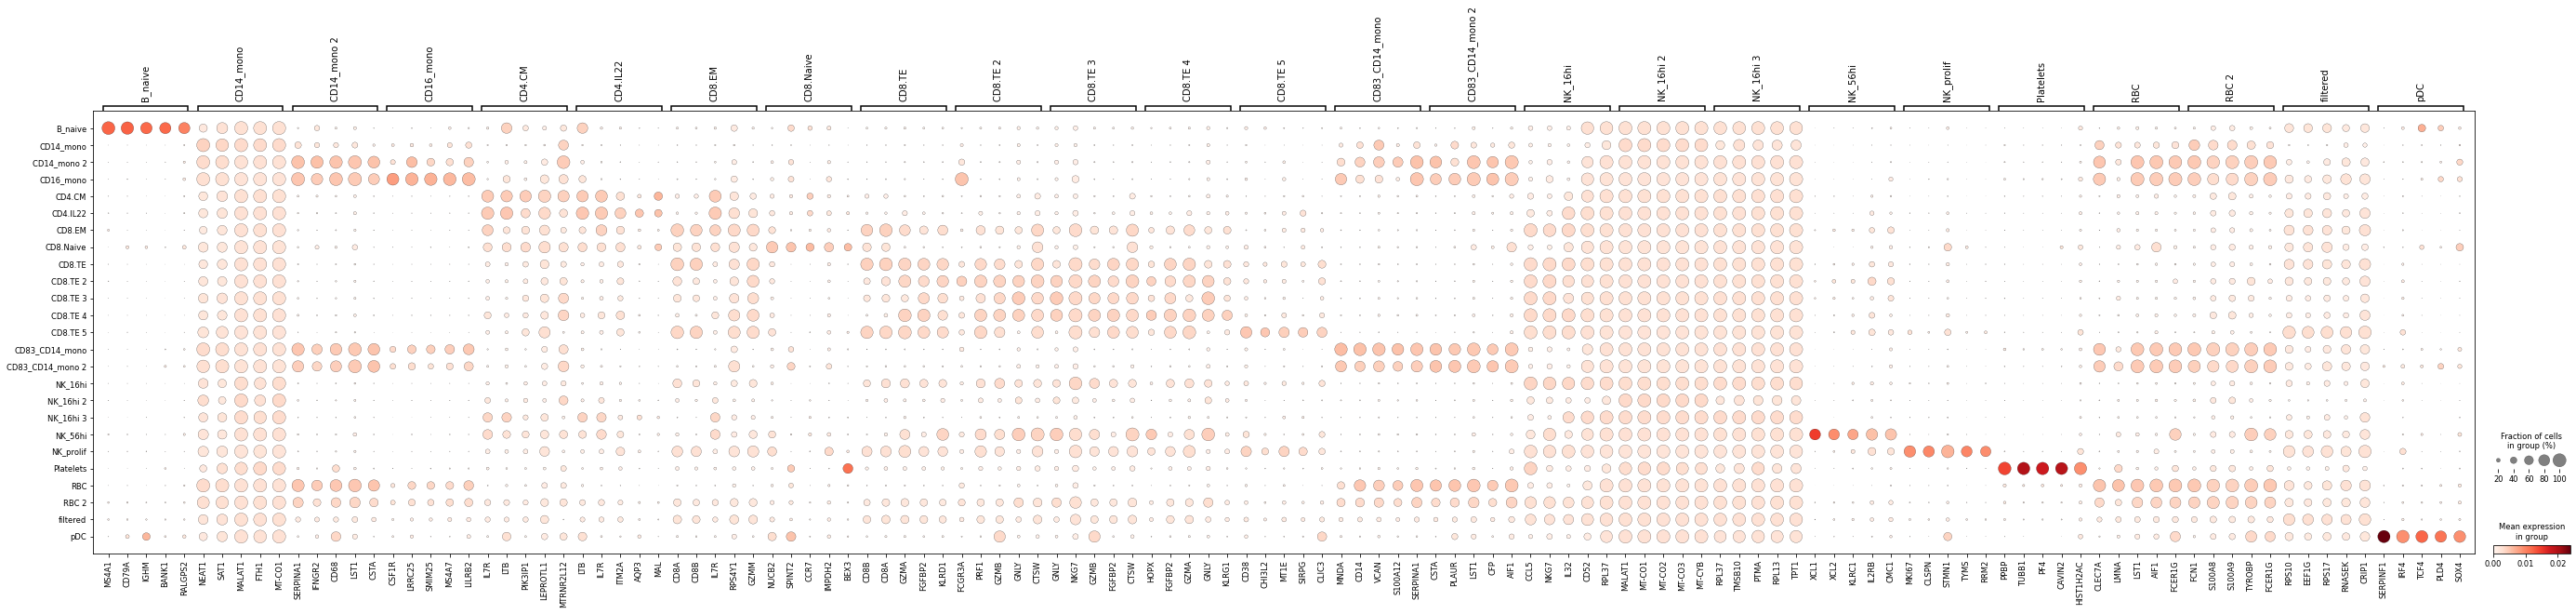

In [17]:
imp.reload(lpy)

flt = np.array((adata.obs["filtered_cells"] == False) & (adata.obs["StudyName"] == "Javi"))
gflt = np.array(adata.var["feature_types"] == "Gene Expression")
adatasub = anndata.AnnData(X=adata.raw.X[flt,:][:,gflt],var=adata.raw.var[gflt],obs=adata.obs[flt]) 
adatasub.raw = adatasub
clusterkey = "sampl"
adatasub.obs[clusterkey] = pd.Categorical([x for x in adatasub.obs[clusterkey]] )
adatasub = lpy.binarizedDE(adatasub,clusterkey,n_gene_to_plot= 5,savepdf= None)
adata.uns[clusterkey+ "_rank_markers"] = adatasub.uns[clusterkey+ "_rank_markers"]
del adatasub

In [18]:
target = "CVID_Series"
renamedico = {
 'CVID1baseline': 'P1 Base',
 'CVID1progression': 'P1 Prog',
 'CVID1convalescence': 'P1 Conv',
 'CVID2baseline': 'P2 Base',
 'CVID2progression': 'P2 Prog',
 'CVID2convalescence': 'P2 Conv',
 'CVID3baseline': 'P3 Base',
 'CVID3progression': 'P3 Prog',
 'CVID3convalescence': 'P3 Conv',
 'CVID4baseline': 'P4 Base',
 'CVID4progression': 'P4 Prog',
 'CVID4convalescence': 'P4 Conv',
 'CVID5baseline': 'P5 Base',
 'CVID5progression': 'P5 Prog',
 'CVID5convalescence': 'P5 Conv',
 tuple(['filtered', 'Other','unassignedbaseline','unassignedprogression','unassignedtofill', 'doubletbaseline', 'doubletconvalescence', 'doubletprogression', 'doublettofill']): 'Other'}

adata.obs[target] = lpy.applyFactorRename([x + y if z == "Javi" else "Other" for x,y,z in zip(adata.obs["patientID"],adata.obs["Stage"],adata.obs["StudyName"])],renamedico)
tmp = lpy.mydoublerainbow([3,3,3,3,3])
tmp.append("#FFFFFF")
adata.uns[target + "_colors"] = np.array(tmp, dtype = "object")
print(len(adata.obs[target].cat.categories))
adata.uns[target + "_colors"].shape
    

16


(16,)

In [19]:
adata.obs["CVID_Series"].value_counts()

Other      252770
P1 Conv     31935
P1 Prog     14972
P1 Base     13624
P2 Base     12644
P2 Prog      9980
P4 Base      5160
P3 Prog      4909
P4 Prog      4780
P2 Conv      4769
P4 Conv      4533
P3 Conv      4189
P5 Base      2608
P3 Base      2467
P5 Conv      1819
P5 Prog      1561
Name: CVID_Series, dtype: int64

In [20]:
renamedico ={'CVID1': 'CVID1',
 'CVID2': 'CVID2',
 'CVID3': 'CVID3',
 'CVID4': 'CVID4',
 'CVID5': 'CVID5',
 'MH8919176': 'MH8919176',
 'MH8919177': 'MH8919177',
 'MH8919178': 'MH8919178',
 'MH8919179': 'MH8919179',
 'MH8919226': 'MH8919226',
 'MH8919227': 'MH8919227',
 'MH8919282': 'MH8919282',
 'MH8919283': 'MH8919283',
 'MH8919332': 'MH8919332',
 'MH8919333': 'MH8919333',
 'newcastle65': 'newcastle65',
 'newcastle74': 'newcastle74',
 'CV0902': 'CV0902',
 'CV0904': 'CV0904',
 'CV0911': 'CV0911',
 'CV0915': 'CV0915',
 'CV0917': 'CV0917',
 'CV0926': 'CV0926',
 'CV0929': 'CV0929',
 'CV0934': 'CV0934',
 'CV0939': 'CV0939',
 'CV0940': 'CV0940',
 'CV0944': 'CV0944',
 'S-HC015': 'S-HC015',
 'S-HC013': 'S-HC013',
 'S-HC017': 'S-HC017',
 'S-HC014': 'S-HC014',
 'S-HC010': 'S-HC010',
 'S-HC008': 'S-HC008',
 'S-M044': 'S-M044',
 'S-M046': 'S-M046',
 'S-M047': 'S-M047',
 'S-M067': 'S-M067',
 'S-S054': 'S-S054',
 'S-S055': 'S-S055',
 'S-S057': 'S-S057',
 'S-S059': 'S-S059',
 'S-S061': 'S-S061',
 'S-M050': 'S-M050',
 'S-M051': 'S-M051',
 'S-M052': 'S-M052',
 'S-M055': 'S-M055',
 'S-S062': 'S-S062',
 'S-S064': 'S-S064',
 'S-S065': 'S-S065',
 'S-S067': 'S-S067',
 'S-S068': 'S-S068',
 'doublet': 'doublet',
 'unassigned': 'unassigned'
}
adata.obs["patientID"] = lpy.applyFactorRename(adata.obs["patientID"],renamedico)
tmp = lpy.mydoublerainbow([5,12,11,6,9,9])
tmp.append("#FFFFFF")
tmp.append("#FFFFFF")
target = "patientID"
adata.uns[target + "_colors"] = np.array(tmp, dtype = "object")
print(len(adata.obs[target].cat.categories))
adata.uns[target + "_colors"].shape

54


(54,)

Trying to set attribute `.uns` of view, copying.


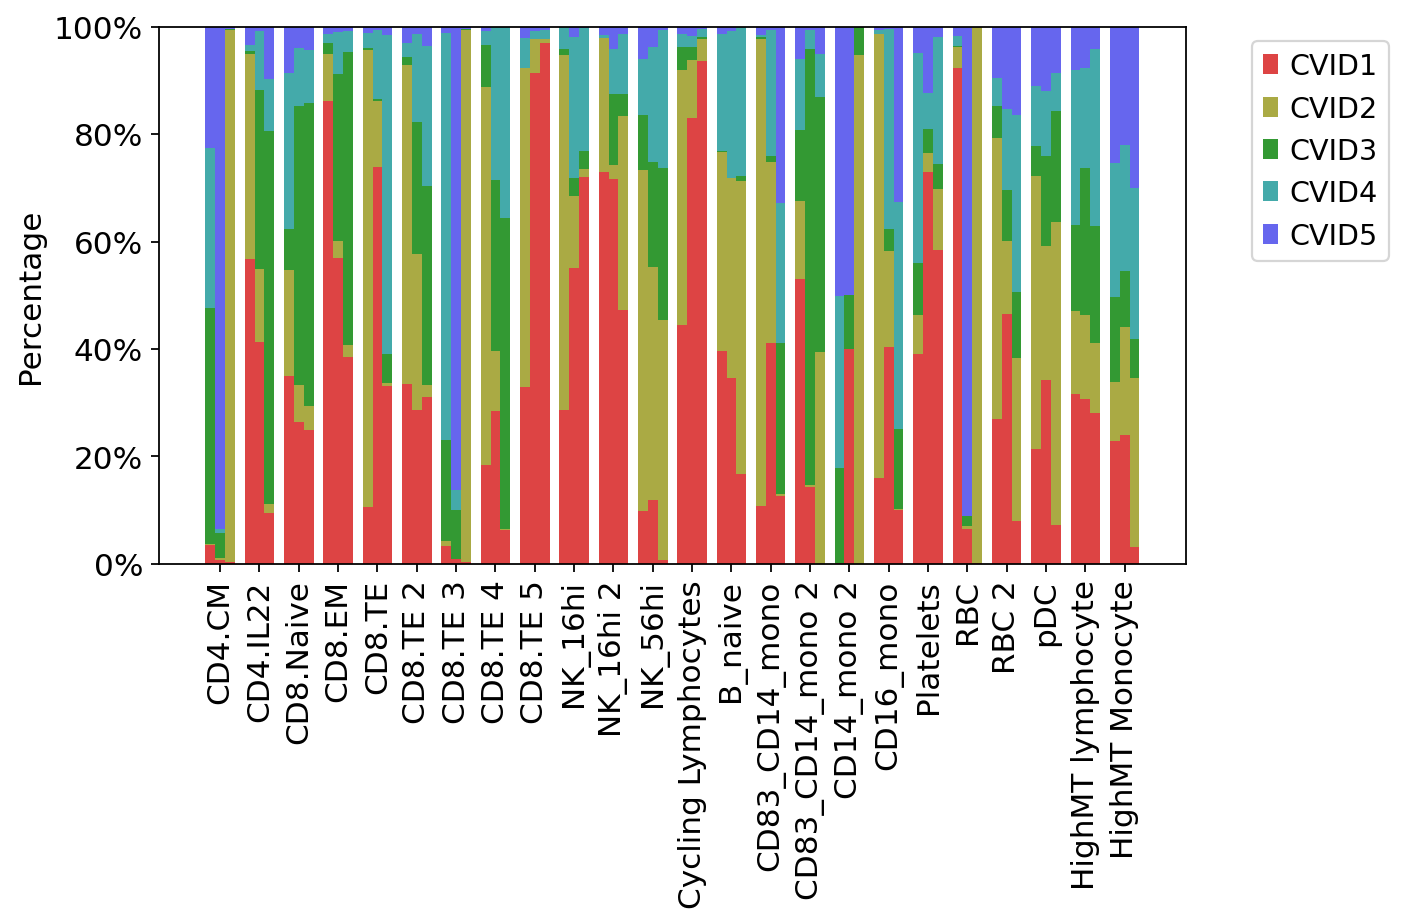

In [21]:
imp.reload(lpy)
sc.settings.set_figure_params(figsize=(9,6), dpi_save=300) 
adatasub = adata[ adata.obs["sampl"] != "filtered"]
adatasub.uns["patientID_colors"] = ["#DD4444", "#AAAA44", "#339933", "#44AAAA", "#6666EE"]
res = lpy.makeBarplot(adatasub, "patientID", "sampl", "Stage", makeProportion =True, save = "mature.pdf")


[100 100 100]
log2p1_count
n_genes
percent_mito


<AxesSubplot:>

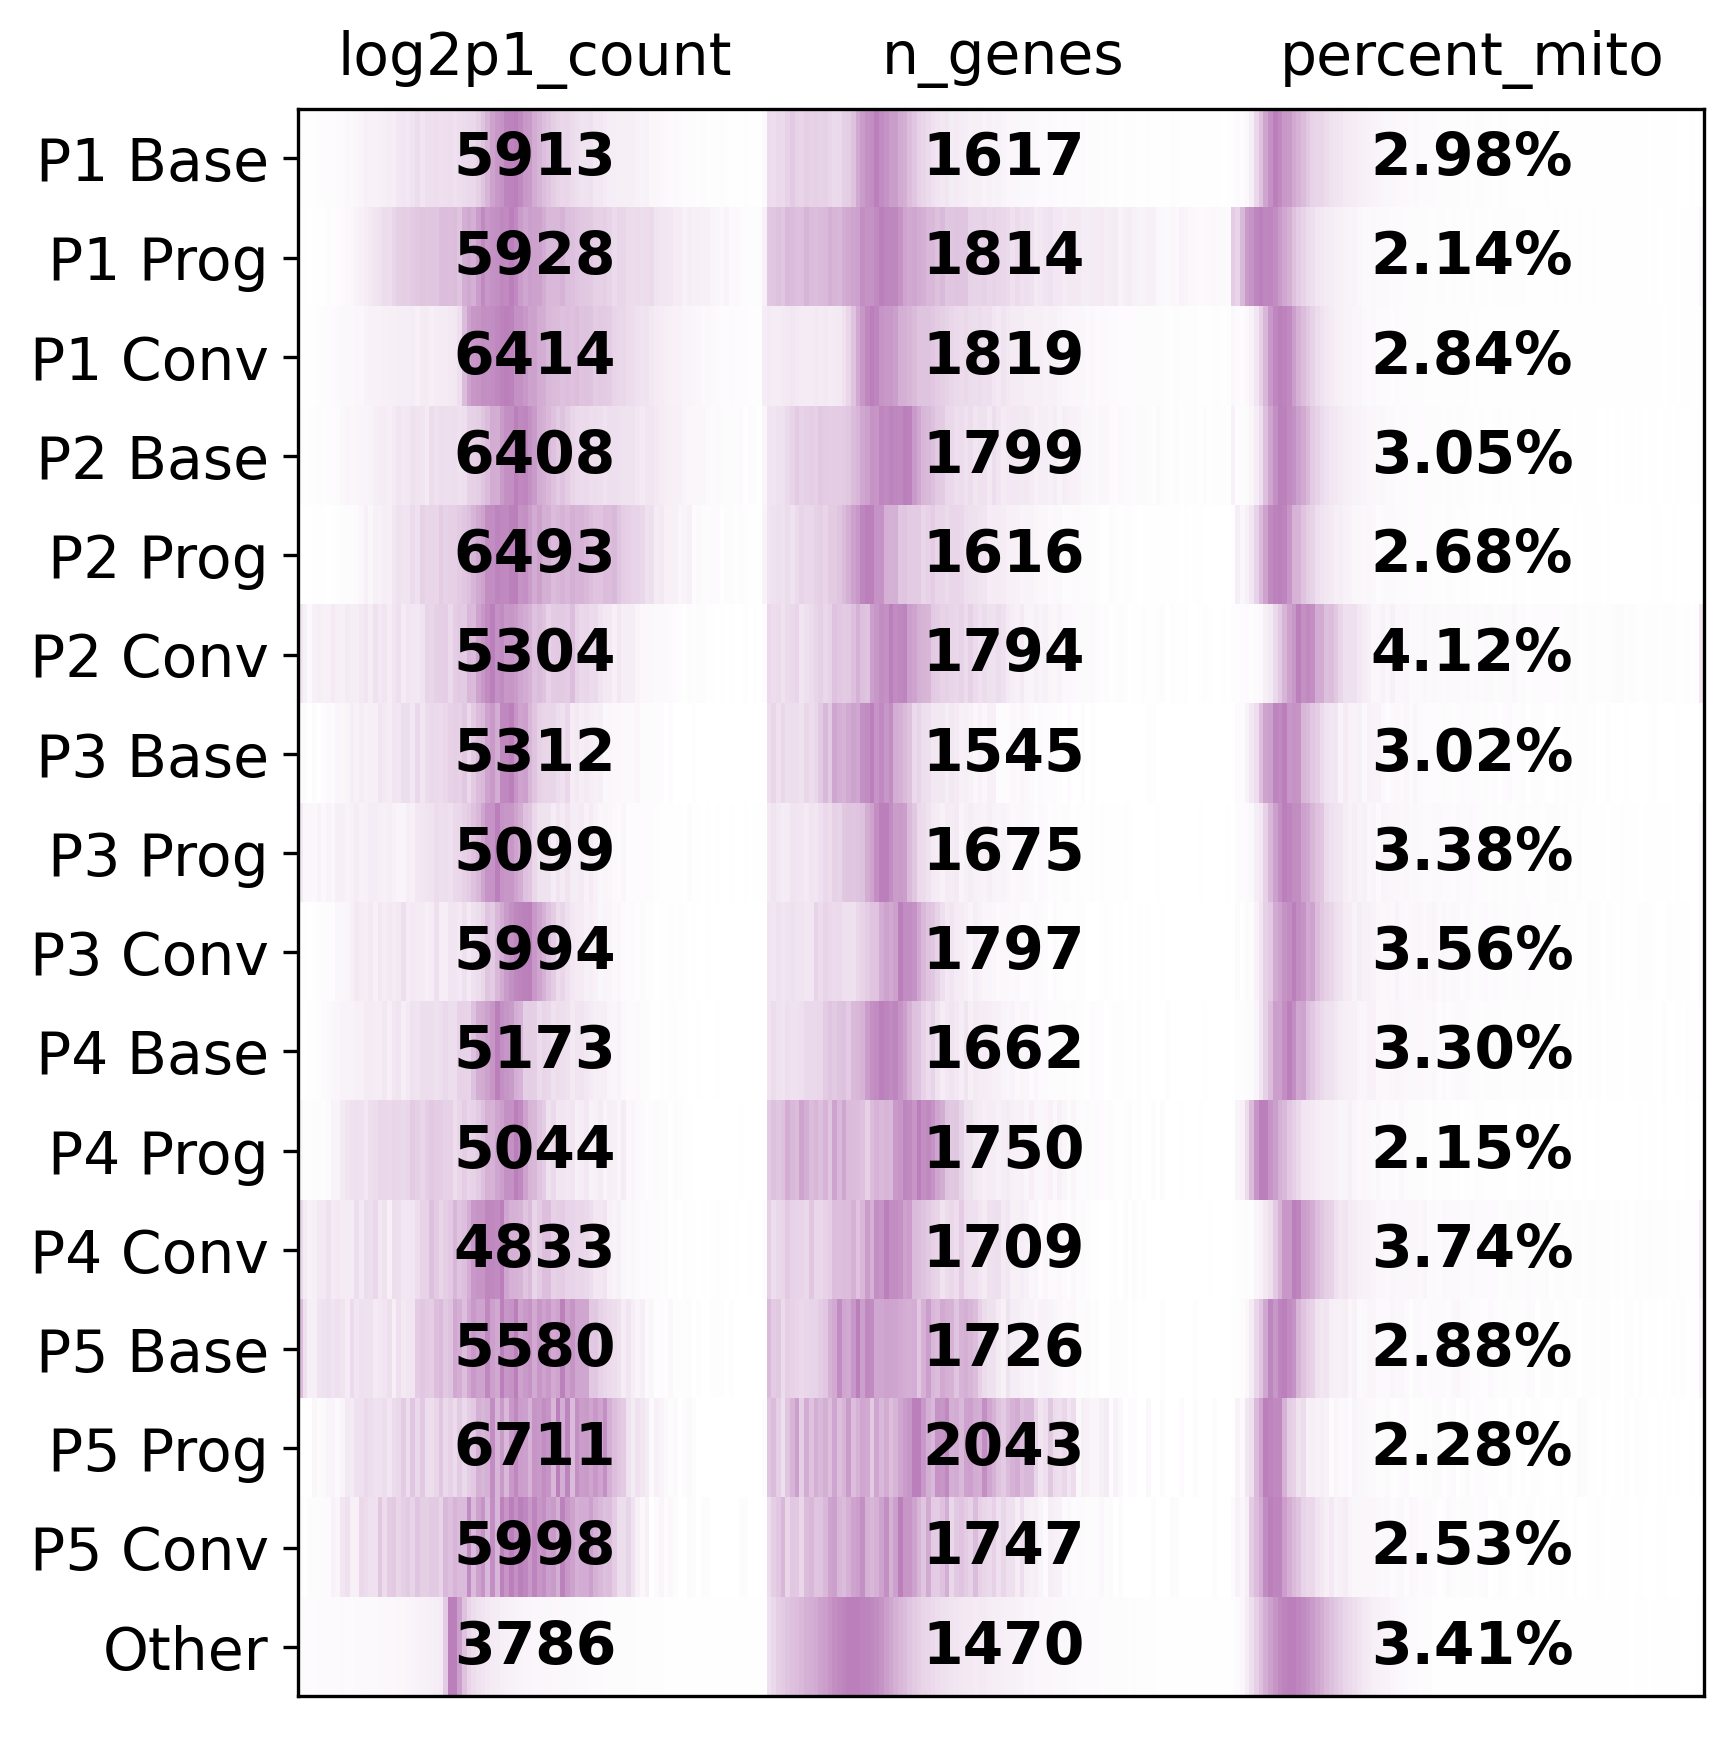

In [22]:
lpy.makeDensityHeatmap(adata.obs, "CVID_Series", ["log2p1_count", "n_genes", "percent_mito"], scaledisplay = [{"format" : ".0f", "scale" : "exp2"} , {"format" : ".0f"}, {"format" : ".2%"}], overwrite_dico = {}, savepdf = "minitable.png" )

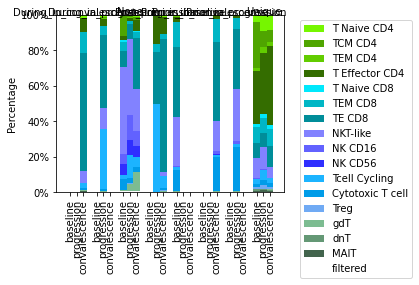

In [23]:
damap = {"None": "NoVDJ_", "Unique" : "Sporadic_"}
#adata.obs["clonotype_class2"] = pd.Categorical([x if (x != "None" and x != "Unique") else damap[x] + y for x,y in zip(adata.obs["clonotype_class"],adata.obs["Stage"])])
#adata.obs["clonotype_class"] = adata.obs["clonotype_class"].cat.reorder_categories([adata.obs["clonotype_class"].cat.categories[x] for x in [4,5,3,6,1,0,7,2] ])
#adata.obs["clonotype_class2"] = adata.obs["clonotype_class2"].cat.reorder_categories([adata.obs["clonotype_class2"].cat.categories[x] for x in [6,9,2,8,1,11,4,7,0,5,10,3] ])
adata.obs["Stage"] = lpy.applyFactorRename(adata.obs["Stage"], {"baseline":"baseline","progression":"progression","convalescence":"convalescence"}) # reorder cats
flt = (adata.obs["StudyName"] == "Javi")&(adata.obs["broad_integrated"] == "Tcell")
counts = lpy.makeBarplot(adata[flt], "general_integrated2", "clonotype_class", "Stage",do_markG=True)


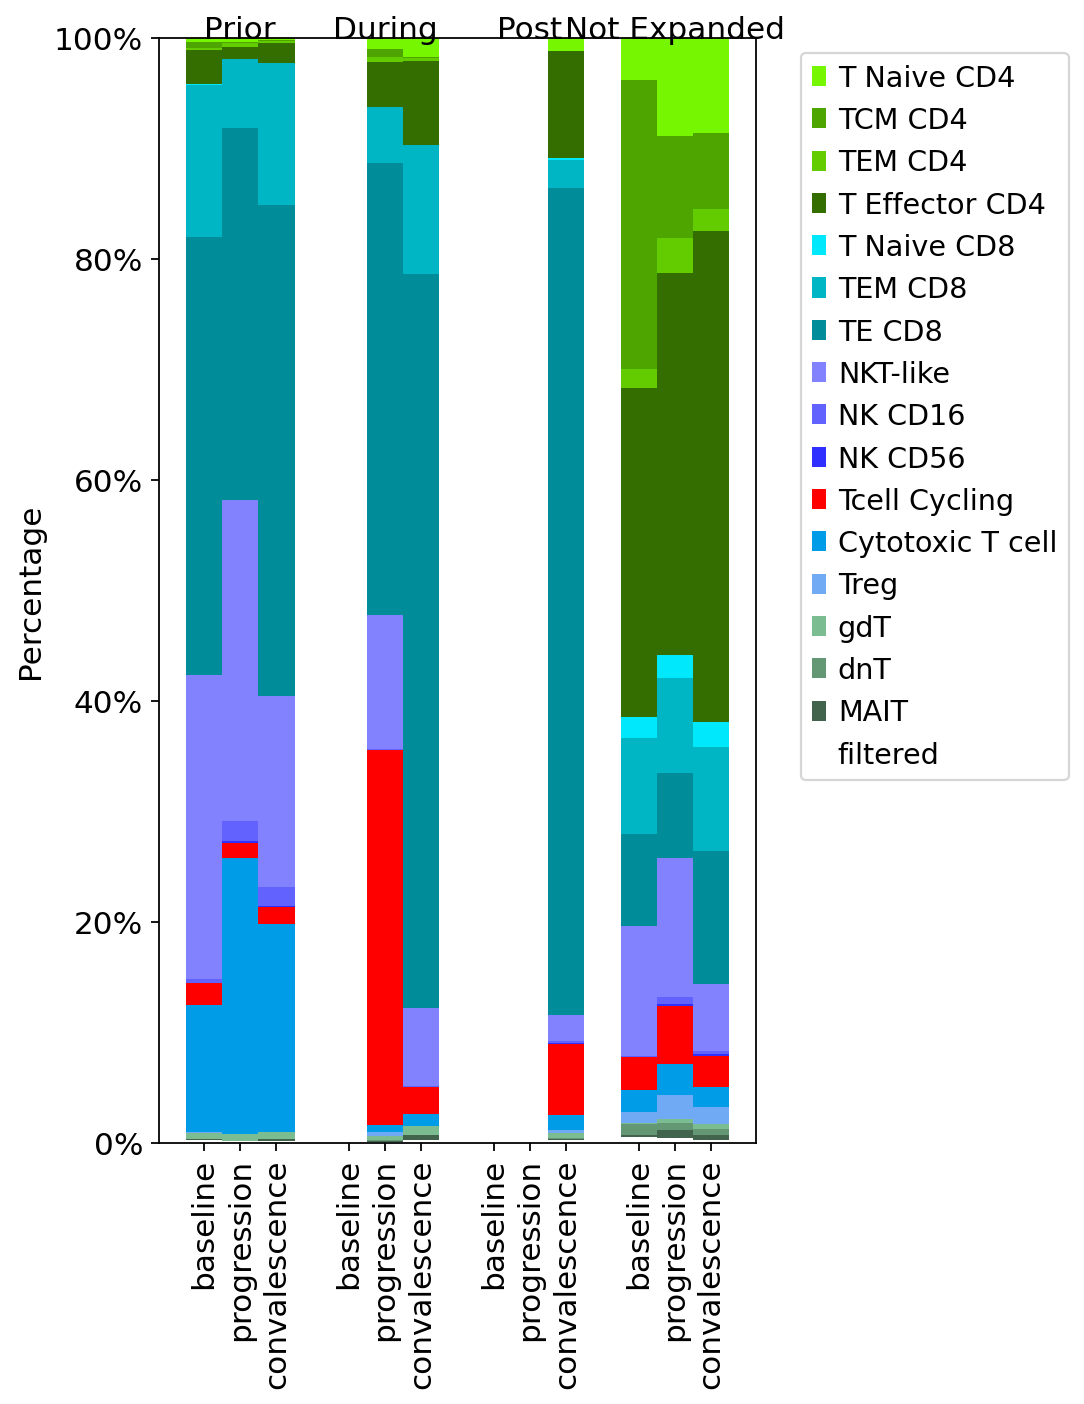

In [24]:
sc.settings.set_figure_params(figsize=(7,9), dpi_save=300) 
adata.obs["clonotype_class"].value_counts()
adata.obs["clonotype_class2"] = lpy.applyFactorRename(adata.obs["clonotype_class"], 
{tuple(["Prior_in_baseline","Prior_in_progression","Prior_in_convalescense"]): "Prior",
tuple(["During_in_progression","During_in_convalescense"]): "During",
tuple(["Post_progression"]): "Post",
tuple(["Unique"]): "Not Expanded"})
flt = (adata.obs["StudyName"] == "Javi")&(adata.obs["broad_integrated"] == "Tcell")&(adata.obs["demultiplexed"] != "doublets")&(adata.obs["clonotype_class"] != "None") &((adata.obs["Stage"] != "progression")|(adata.obs["clonotype_class"] != "Post_progression"))
counts = lpy.makeBarplot(adata[flt], "general_integrated2", "clonotype_class2", "Stage",do_markG=True, save= "Tcell_expansion.pdf")

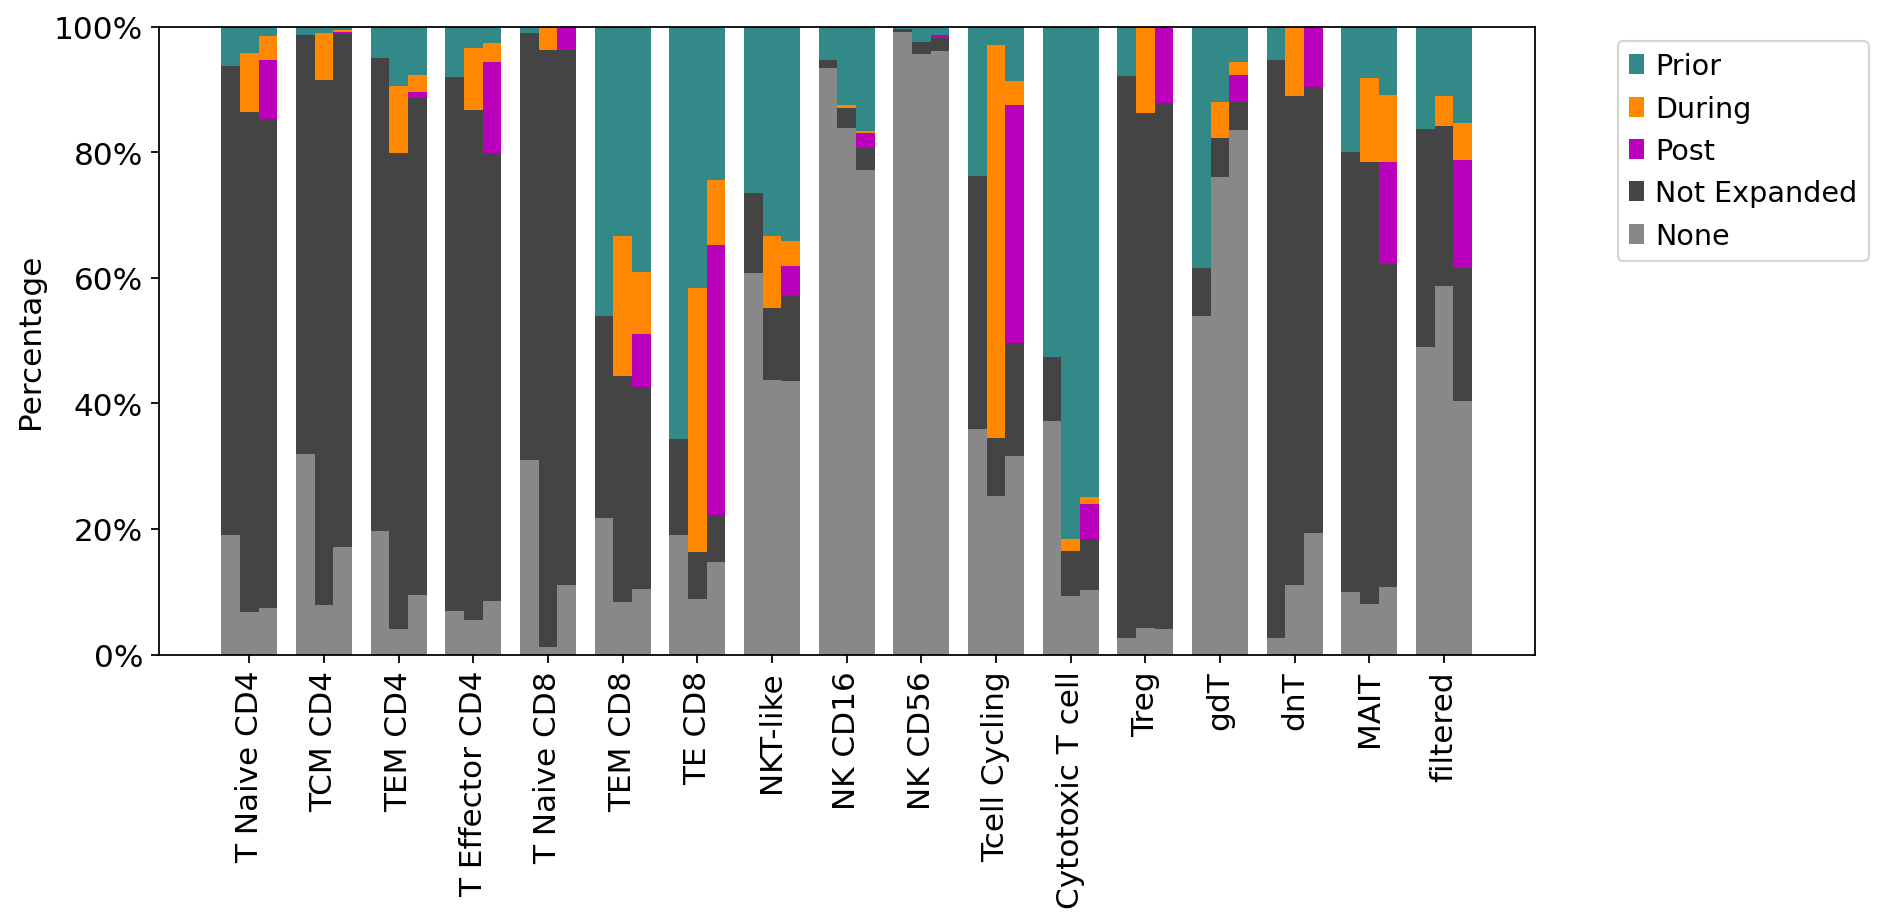

In [25]:
sc.settings.set_figure_params(figsize=(12,6), dpi_save=300) 
flt = (adata.obs["StudyName"] == "Javi")&(adata.obs["broad_integrated"] == "Tcell")&(adata.obs["demultiplexed"] != "doublets")&((adata.obs["Stage"] != "progression")|(adata.obs["clonotype_class"] != "Post_progression"))
adata.uns["clonotype_class2_colors"] = ["#338888", "#FF8800", "#BB00BB","#444444","#888888"]
counts = lpy.makeBarplot(adata[flt], "clonotype_class2", "general_integrated2", "Stage", save= "Tcell_expansion2.pdf")

In [26]:
adata.obs[flt & (adata.obs["Stage"] == "progression")&(adata.obs["clonotype_class"] == "Post_progression")]["clonotype"]
#lpy.RTable(adata[flt].obs, "clonotype_class", "Stage")

I-O-5_8_C-0_TGGCGCATCGCCAGCA-1    CVID2_T_clonotype190
I-O-6_9_C-0_AAAGATGCAGGGCATA-1     CVID1_T_clonotype90
I-O-6_9_C-0_AAGCCGCTCCTGCAGG-1     CVID1_T_clonotype59
I-O-6_9_C-0_ACATCAGCAATGTAAG-1     CVID1_T_clonotype90
I-O-6_9_C-0_AGCGTCGAGGACATTA-1     CVID1_T_clonotype25
I-O-6_9_C-0_CAGCAGCAGATATGGT-1    CVID1_T_clonotype123
I-O-6_9_C-0_CATCGAACAAACGTGG-1    CVID1_T_clonotype128
I-O-6_9_C-0_CCGGTAGCAGCTCGAC-1    CVID1_T_clonotype123
I-O-6_9_C-0_CCTTCGATCGCTAGCG-1     CVID1_T_clonotype75
I-O-6_9_C-0_CGAGAAGTCCAGGGCT-1     CVID1_T_clonotype59
I-O-6_9_C-0_CGGAGTCGTTTGTTTC-1    CVID1_T_clonotype177
I-O-6_9_C-0_CTACACCTCGATAGAA-1    CVID1_T_clonotype216
I-O-6_9_C-0_GACGTTATCAACGCTA-1     CVID1_T_clonotype59
I-O-6_9_C-0_GATCTAGCATCGGGTC-1     CVID1_T_clonotype54
I-O-6_9_C-0_GATGAGGCAGATAATG-1    CVID1_T_clonotype274
I-O-6_9_C-0_GGAATAAAGATCGGGT-1     CVID1_T_clonotype75
I-O-6_9_C-0_GGGTTGCGTTTGGGCC-1     CVID1_T_clonotype59
I-O-6_9_C-0_GTATCTTCACGCTTTC-1     CVID1_T_clonotype59
I-O-6_9_C-

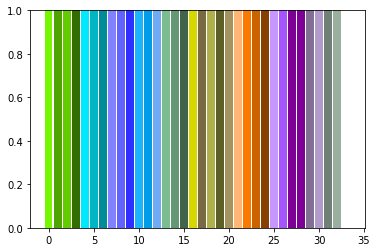

['#76f600',
 '#4fa500',
 '#62cc00',
 '#346d00',
 '#00e8fc',
 '#00b6c5',
 '#008d99',
 '#8282ff',
 '#6262ff',
 '#2f2fff',
 '#1cb4ff',
 '#009ce8',
 '#70aaf4',
 '#7cbc91',
 '#649875',
 '#42644d',
 '#d6d600',
 '#796a43',
 '#b0b04a',
 '#5e5e27',
 '#a6925c',
 '#ffb674',
 '#fc7900',
 '#cc6200',
 '#864000',
 '#c896ff',
 '#a654ff',
 '#7e0097',
 '#7e0097',
 '#807194',
 '#b09bcb',
 '#708076',
 '#9aafa1',
 '#ffffff']

In [27]:
imp.reload(lpy)  # NOT THE RIGHT COLORS
adata.uns["general_integrated2_colors"] = lpy.get2Dcolor([
[0.6, -1.0,-0.8], #  T naive CD4': '#007100',
[0.25, -1.0,-0.8], #  'TCM CD4': '#a7a7ff',
[0.4, -1.0,-0.8], #  'TEM CD4': '#EF006C',
[0.1, -1.0,-0.8], #  'T Effector CD4': '#FF20FF',
[0.6, 0.0,-1.0], #  'T Naive CD8': '#EF00D8',
[0.35, 0.0,-1.0], #  'TEM CD8': '#B300B4',
[0.2, 0.0,-1.0], #  'TE CD8': '#0000FF',
[0.35, 1.0,-1.0], #  'NKT-like': '#0000D8',
[0.25, 1.0,-1.0], #  'NK CD16': '#0000B4',
[0.15, 1.0,-1.0], #  'NK CD56': '#89b200',
[0.4, 0.5,-1.0], #  'Tcell Cycling': '#145800',
[0.3, 0.5,-1.0], #  'Cytotoxic T cell': '#249e00',
[0.4, 0.5,-0.6], #  'Treg': '#2dc600',
[0.4,-0.5,-0.6], #  'gdT': '#005828',
[0.25,-0.5,-0.6], #  'dnT': '#009d47',
[0.1,-0.5,-0.6], #  'MAIT': '#00c559',
[0.6, -1.0, 0.0], #  'Bcell naive': '#00FF6C',
[0.15, -0.75, 0.25], #  'Plasma Bcells': '#005800'
[0.4, -0.85, 0.0], #  'Bcell US-mem': '#00B048',
[0.1, -0.85, 0.0], #  'Bcell S-mem': '#008424',
[0.3, -0.75, 0.25], #  'Plasma Bcells': '#005800'
[0.6, -1.0, 0.8], #  'Classical monocytes': '#002a73',
[0.4, -1.0, 0.8], #  'Cl. mono S100A8': '#004ed6',
[0.25, -1.0, 0.8], #  'Cl. mono IFN': '#5090ff',
[0.1 ,-1.0, 0.8], #  'Cl. mono inflammasome': '#7babff',
[0.5, 0.7, 1.0], #  'Intermediate monocytes': '#5b00e6',
[0.3, 0.7, 1.0], #  'Non-classical monocytes': '#8c41ff',
[0.1, 0.0, 1.0], #  'cDCs': '#4b0057',
[0.1, 0.0, 1.0], #  'ASDC': '#8a00a1',
[0.2, 0.2, 0.25], #  'pDC': '#484848',
[0.4, 0.2, 0.25], #  'hSC': '#6C6C6C',
[0.2, -0.2, -0.25], #  'Platelets': '#909090',
[0.4, -0.2, -0.25],  #  'Erythrocytes': '#880000',
[1.0, -0.2, -0.25]  #  'filtered
])
adata.uns["general_integrated2_colors"]

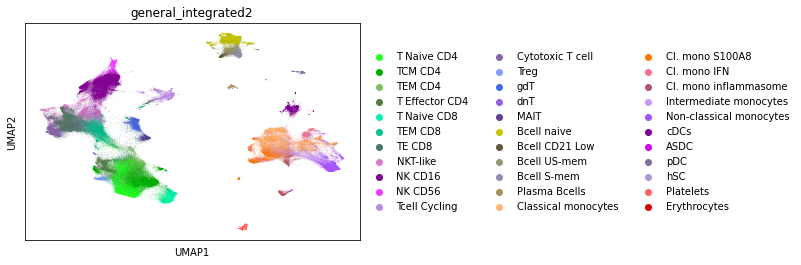

In [28]:
pd.set_option('display.min_rows', 50)
pd.set_option('display.max_rows', 50)
annotation = ["general_integrated2","general_integrated2","general_integrated2","general_integrated2"]
manifold = ["X_umap_everything_unpool","X_umap_every_tcell20unpool","X_umap_every_bcell20unpool","X_umap_every_mono20unpool"]
filt = [["Bcell","Tcell","Monocytes"], ["Tcell"], ["Bcell"], ["Monocytes"]]
s = 0;
adatasub = adata[ [ (x in filt[s]) and (y != 'filtered') for x,y in zip(adata.obs["broad_integrated"], adata.obs[annotation[s]] )] ]
adatasub.obsm["umap"] = adatasub.obsm[manifold[s]]
sc.pl.umap(adatasub,color=annotation[s])#,save='_general_cd19.pdf')

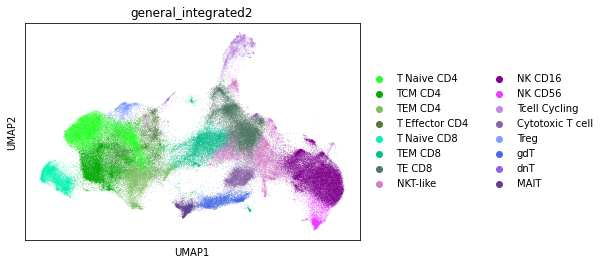

In [29]:
s = 1;
adatasub = adata[ [ (x in filt[s]) and (y != 'filtered') for x,y in zip(adata.obs["broad_integrated"], adata.obs[annotation[s]] )] ]
adatasub.obsm["umap"] = adatasub.obsm[manifold[s]]
sc.pl.umap(adatasub,color=annotation[s],save='_tcells.pdf')

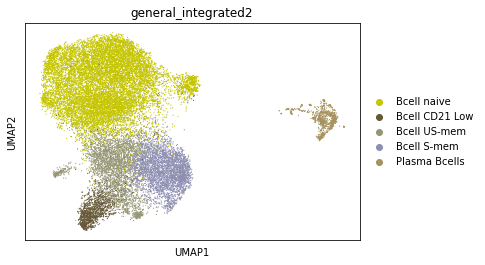

In [30]:
s = 2;
adatasub = adata[ [ (x in filt[s]) and (y != 'filtered') for x,y in zip(adata.obs["broad_integrated"], adata.obs[annotation[s]] )] ]
adatasub.obsm["umap"] = adatasub.obsm[manifold[s]]
sc.pl.umap(adatasub,color=annotation[s])#,save='_bcells_cd19.png')

In [31]:
s = 3;
adatasub = adata[ [ (x in filt[s]) and (y != 'filtered') for x,y in zip(adata.obs["broad_integrated"], adata.obs[annotation[s]] )] ]
adatasub.obsm["umap"] = adatasub.obsm[manifold[s]]
sc.pl.umap(adatasub,color=annotation[s],save='_monocyte_and_other.pdf')

NameError: name 'annotation' is not defined

In [32]:
adata.obs["tmp"] = lpy.applyFactorRename(adata.obs["StudyName"], {tuple(["China", "Haniffa"]) : "Non-CVID","Javi": "CVID"})
adata.obs["tmp"].value_counts()

Non-CVID    238354
CVID        134366
Name: tmp, dtype: int64

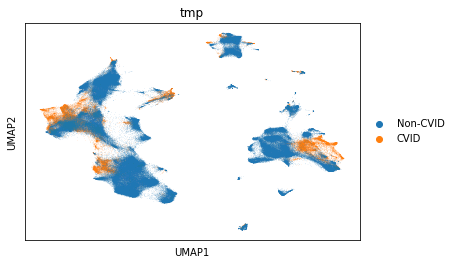

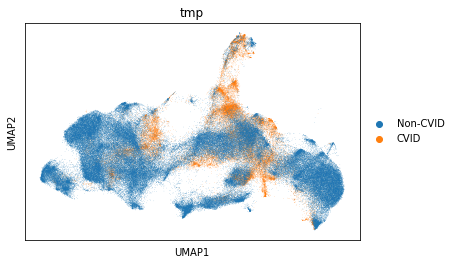

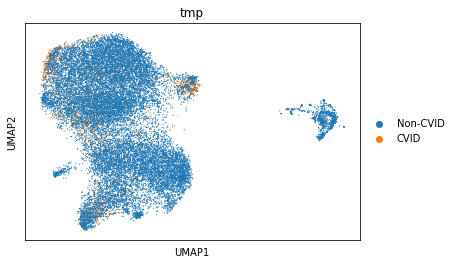

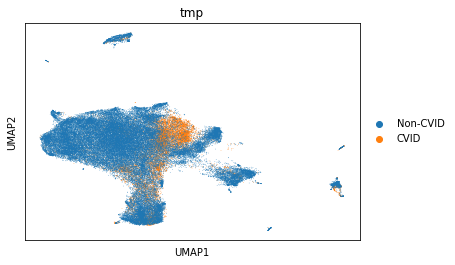

In [33]:
pd.set_option('display.min_rows', 50)
pd.set_option('display.max_rows', 50)
annotation = ["general_integrated2","general_integrated2","general_integrated2","general_integrated2"]
manifold = ["X_umap_everything_unpool","X_umap_every_tcell20unpool","X_umap_every_bcell20unpool","X_umap_every_mono20unpool"]
filt = [["Bcell","Tcell","Monocytes"], ["Tcell"], ["Bcell"], ["Monocytes"]]
name = ["general", "Tcell", "Bcell", "Monocytes"]
for s in range(4):
    adatasub = adata[ [ (x in filt[s]) and (y != 'filtered') for x,y in zip(adata.obs["broad_integrated"], adata.obs[annotation[s]] )] ]
    adatasub.obsm["umap"] = adatasub.obsm[manifold[s]]
    sc.pl.umap(adatasub,color="tmp",save='CVID_' + name[s]+'.png')

In [34]:
lpy.RTable(adata.obs, "broad_integrated", "StudyName")

,China,Haniffa,Javi
Tcell,80890,68186,42511
Bcell,12689,7628,2149
Monocytes,45780,16662,16468
HighMT and doublets,2946,2904,12133
filtered,501,168,61105


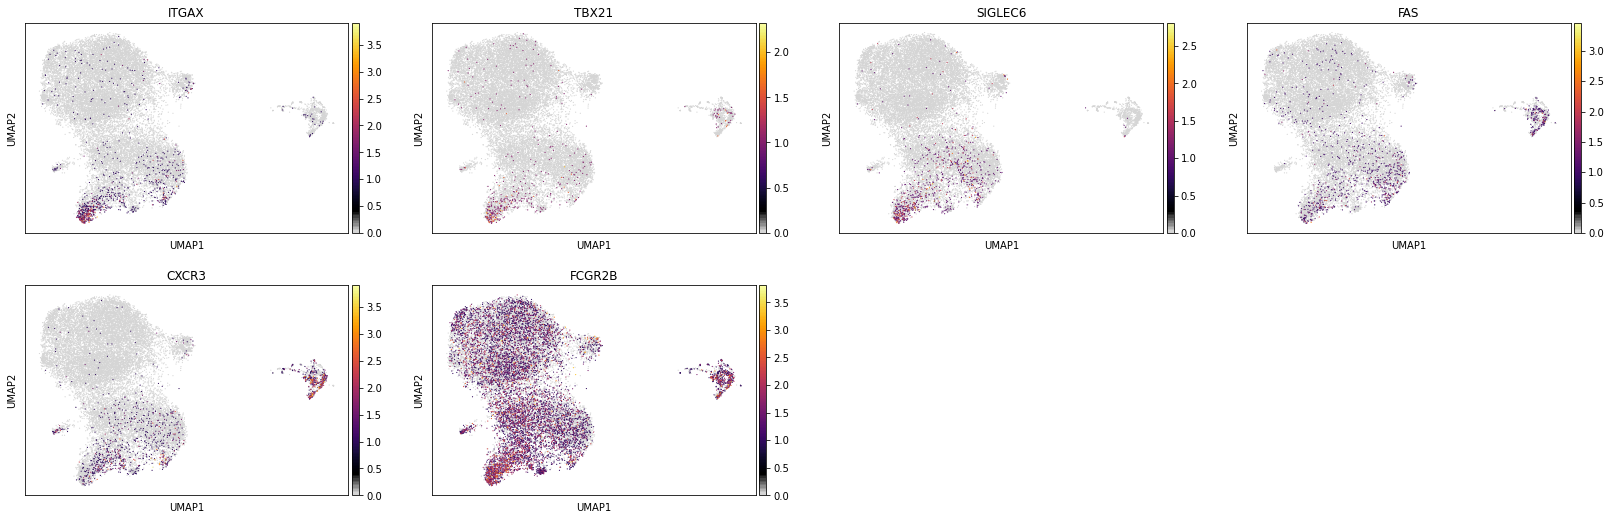

In [35]:
genes = ["ITGAX", "TBX21", "SIGLEC6", "FAS", "CXCR3", "FCGR2B"]
name = ["general", "Tcell", "Bcell", "Monocytes"]
filt = [["Bcell","Tcell","Monocytes"], ["Tcell"], ["Bcell"], ["Monocytes"]]
s=2
manifold = ["X_umap_everything_unpool","X_umap_every_tcell20unpool","X_umap_every_bcell20unpool","X_umap_every_mono20unpool"]
annotation = ["general_integrated2","general_integrated2","general_integrated2","general_integrated2"]
adatasub = adata[ [ (x in filt[s]) and (y != 'filtered') for x,y in zip(adata.obs["broad_integrated"], adata.obs[annotation[s]] )] ]
adatasub.obsm["umap"] = adatasub.obsm[manifold[s]]
import matplotlib.colors
top = plt.colormaps['Greys'].resampled(16)
bottom = plt.colormaps['inferno'].resampled(128)
newcolors = np.vstack((top(np.linspace(0.25, 1, 16)), bottom(np.linspace(0, 1, 128))))
newcmp = matplotlib.colors.ListedColormap(newcolors, name='OrangeBlue')
sc.pl.umap(adatasub,color=genes,save='bcells_markers' + name[s]+'.pdf',use_raw=False, color_map = newcmp, na_color = "#AAAAAA22")


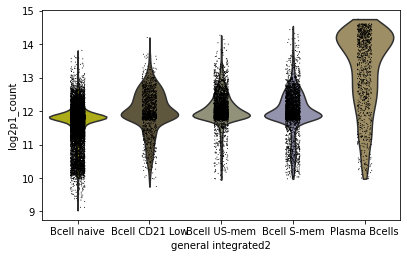

In [36]:
sc.pl.violin(adatasub,groupby="general_integrated2",keys=['log2p1_count'],save='bcells_markerdds' + name[s]+'.png')

In [37]:
adata.obs["tmp"] = [x + "_" + y for x,y in zip(adata.obs["patientID"],adata.obs["Stage"])]
outtable = {}
for s in ["baseline", "progression", "convalescence"]:
    flt = np.array(adata.obs["VDJ_type"] == "BCR")&([x not in ["CVID3", "CVID5", "doublet", "unassigned"] for x in adata.obs["patientID"]])&([x in [s] for x in adata.obs["Stage"]])
    outtable[s] = lpy.RTable(adata[flt].obs, "TRA_V_Gene", "patientID",sorted=False)
    outtable[s] = outtable[s][0:(outtable[s].shape[0]-1)]
    lncv = outtable[s].shape[1]
    total = np.sum(outtable[s],axis =0) 
    grandtotal = np.sum(total)
    outtable[s]["cvidsum"] = [sum(outtable[s].iloc[i][0:3]) for i in range(outtable[s].shape[0])]
    outtable[s]["ncvidsum"] = [sum(outtable[s].iloc[i][3:lncv]) for i in range(outtable[s].shape[0])]
    
    outtable[s]["enrichment"] = [outtable[s].iloc[i][lncv] * grandtotal / ((outtable[s].iloc[i][lncv]+outtable[s].iloc[i][lncv+1])*sum(total[0:3])) for i in range(outtable[s].shape[0])]

    outtable[s]["hypergeo"] = [2.0 - stats.hypergeom.cdf(outtable[s].iloc[i][lncv], grandtotal, outtable[s].iloc[i][lncv]+outtable[s].iloc[i][lncv+1], sum(total[0:3]))*2 if e > 1.0 else stats.hypergeom.cdf(outtable[s].iloc[i][lncv], grandtotal, outtable[s].iloc[i][lncv]+outtable[s].iloc[i][lncv+1], sum(total[0:3]) )*2 for i,e in zip(range(outtable[s].shape[0]),outtable[s]["enrichment"])]
    outtable[s]["ttest"] = [stats.ttest_ind(outtable[s].iloc[i][0:3] / total[0:3], outtable[s].iloc[i][3:lncv]/ total[3:lncv]).pvalue for i in range(outtable[s].shape[0])] 

In [38]:
from scipy import stats
adata.obs["tmp"] = lpy.applyFactorRename([x + "_" + y for x,y in zip(adata.obs["patientID"],adata.obs["Stage"])],
   {"CVID1_baseline" : "CVID1_baseline",
    "CVID2_baseline" : "CVID2_baseline",
    "CVID4_baseline" : "CVID4_baseline",
    "S-HC008_baseline" : "S-HC008_baseline",
    "S-HC010_baseline" : "S-HC010_baseline",
    "S-HC013_baseline" : "S-HC013_baseline",
    "S-HC014_baseline" : "S-HC014_baseline",
   }
)
outtable = {}
for s in ["progression", "convalescence"]:
    for c in ["CVID", "mild", "severe"]:
        tn = c + "_" + s
        nbb = 3 if c == "CVID" else 4
        
        flt = np.array(adata.obs["VDJ_type"] == "BCR")&([x not in ["CVID3", "CVID5", "doublet", "unassigned"] for x in adata.obs["patientID"]])&([x in ["baseline" , s] for x in adata.obs["Stage"]])
        if (c == "CVID"): flt = flt & (adata.obs["StudyName"] == "Javi")
        elif (c == "mild"): flt = flt& (adata.obs["StudyName"] != "Javi")  & (adata.obs["CovidSeverity"] != "Severe")
        else: flt = flt & (adata.obs["StudyName"] != "Javi") & (adata.obs["CovidSeverity"] != "Mild")
        
        outtable[tn] = lpy.RTable(adata[flt].obs, "TRA_V_Gene", "tmp",sorted=False)
        print(outtable[tn].keys()[0:nbb])
        outtable[tn] = outtable[tn][0:(outtable[tn].shape[0]-1)]
        lncv = outtable[tn].shape[1]
        total = np.sum(outtable[tn],axis =0) 
        grandtotal = np.sum(total)
        outtable[tn]["baseline"] = [sum(outtable[tn].iloc[i][0:nbb]) for i in range(outtable[tn].shape[0])]
        outtable[tn][s] = [sum(outtable[tn].iloc[i][nbb:lncv]) for i in range(outtable[tn].shape[0])]
        
        outtable[tn]["enrichment"] = [outtable[tn].iloc[i][lncv+1] * grandtotal / ((outtable[tn].iloc[i][lncv]+outtable[tn].iloc[i][lncv+1])*sum(total[nbb:lncv])) for i in range(outtable[tn].shape[0])]
        outtable[tn]["hypergeo"] = [2.0 - stats.hypergeom.cdf(outtable[tn].iloc[i][lncv]-1, grandtotal, outtable[tn].iloc[i][lncv]+outtable[tn].iloc[i][lncv+1], sum(total[0:nbb]))*2 if e > 1.0 else stats.hypergeom.cdf(outtable[tn].iloc[i][lncv], grandtotal, outtable[tn].iloc[i][lncv]+outtable[tn].iloc[i][lncv+1], sum(total[0:nbb]) )*2 for i,e in zip(range(outtable[tn].shape[0]),outtable[tn]["enrichment"])]
        outtable[tn]["ttest"] = [stats.ttest_ind(outtable[tn].iloc[i][0:nbb] / total[0:nbb], outtable[tn].iloc[i][nbb:lncv]/ total[nbb:lncv]).pvalue for i in range(outtable[tn].shape[0])]

Index(['CVID1_baseline', 'CVID2_baseline', 'CVID4_baseline'], dtype='object')
Index(['S-HC008_baseline', 'S-HC010_baseline', 'S-HC013_baseline',
       'S-HC014_baseline'],
      dtype='object')
Index(['S-HC008_baseline', 'S-HC010_baseline', 'S-HC013_baseline',
       'S-HC014_baseline'],
      dtype='object')
Index(['CVID1_baseline', 'CVID2_baseline', 'CVID4_baseline'], dtype='object')
Index(['S-HC008_baseline', 'S-HC010_baseline', 'S-HC013_baseline',
       'S-HC014_baseline'],
      dtype='object')
Index(['S-HC008_baseline', 'S-HC010_baseline', 'S-HC013_baseline',
       'S-HC014_baseline'],
      dtype='object')


In [39]:
adata.obs["CovidSeverity"].value_counts()

Control    192320
Mild       133875
Severe      46525
Name: CovidSeverity, dtype: int64

In [40]:
adata.obs["TRA_V_Gene"][adata.obs["TRA_V_Gene"] == "IGHV4-30-2"] = "IGHV4-30-4"
#adata.obs["TRA_V_Gene"].value_counts(sort = False)

In [41]:
import scipy.stats as stats
s = "baseline"; i = 5
res = stats.ttest_ind(outtable[s].iloc[i][0:3], outtable[s].iloc[i][3:(outtable[s].shape[1]-1)])
res

Ttest_indResult(statistic=0.0, pvalue=1.0)

In [42]:
for x in outtable.keys(): outtable[x].to_csv(x + ".csv")

In [43]:
outtable["baseline"].to_csv("base.csv")
outtable["convalescence"].to_csv("conv.csv")
outtable["progression"].to_csv("prog.csv")

In [44]:
outtable["progression"]

,CVID1,CVID2,CVID4,S-M044,S-M046,S-M047,S-M067,S-S054,S-S055,S-S057,S-S059,S-S061,cvidsum,ncvidsum,enrichment,hypergeo,ttest
IGHV1-2,0,0,6,0,7,1,28,17,5,6,1,13,6,78,0.449932,2.749193e-02,0.532497
IGHV1-3,2,5,3,20,1,3,13,11,23,3,10,4,10,88,0.642761,1.473190e-01,0.460438
IGHV1-8,0,12,0,9,1,2,9,0,10,4,2,7,12,44,1.349797,1.924177e-01,0.792876
IGHV1-18,4,15,2,25,10,9,28,16,26,9,12,17,21,152,0.764625,2.014977e-01,0.028084
IGHV1-24,2,6,1,8,2,0,6,4,42,1,3,5,9,71,0.708644,3.236163e-01,0.852702
IGHV1-45,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0.000000,1.682492e+00,0.588449
IGHV1-46,0,4,4,16,10,2,13,5,21,7,4,18,8,96,0.484543,2.043053e-02,0.136902
IGHV1-58,0,0,1,2,1,2,5,1,5,2,1,2,1,21,0.286321,2.287529e-01,0.098525
IGHV1-69,0,0,3,0,1,0,12,0,1,0,0,0,3,14,1.111598,5.577249e-01,0.450216
IGHV1-69-2,0,0,0,4,0,0,0,0,0,0,0,0,0,4,0.000000,1.001451e+00,0.588449


In [45]:
adata.write_h5ad("int5.h5ad")

... storing 'VDJ_type' as categorical
... storing 'clonotype' as categorical
... storing 'clonotype_class' as categorical
... storing 'TRA_V_Gene' as categorical
... storing 'TRA_J_Gene' as categorical
... storing 'TRB_V_Gene' as categorical
... storing 'TRB_J_Gene' as categorical
... storing 'TR_D_Genes' as categorical
... storing 'TR_C_Genes' as categorical
